In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Смотрим на данные

In [ ]:
# загрузим исходный набор данных
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

In [ ]:
# Это специальный тип данных библиотеки sklearn, который похож по своему устройству на обычный словарь
type(california)

sklearn.utils._bunch.Bunch

In [ ]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

MedInc – средний доход в группе блоков  
HouseAge — средний возраст дома в группе блоков.  
AveRooms — среднее количество комнат на семью.  
AveBedrms — среднее количество спален на семью.  
Население - население группы блоков  
AveOccup — среднее количество членов домохозяйства  
Latitude - широта группы блоков  
Longitude - долгота группы блоков  

In [ ]:
print(type(california.data), type(california.target))
print(california.data.shape, california.target.shape)


<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(20640, 8) (20640,)


In [ ]:
data = pd.DataFrame(california.data, columns = california.feature_names)
data['Price'] = california.target
data.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521


In [ ]:
# пропусков в данных нет
# все данные выражены в численных шкалах
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
# основная статистика по датасету
data.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57,2.07
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00,1.15
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80,1.20
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01,2.65
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31,5.00


In [ ]:
# целевая переменная и факторы
y = data['Price']
X = data.drop('Price', axis=1)
y.shape, X.shape

((20640,), (20640, 8))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15480, 8), (5160, 8), (15480,), (5160,))

# LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([ 4.47600069e-01,  9.56752596e-03, -1.24755956e-01,  7.94471254e-01,
       -1.43902596e-06, -3.44307993e-03, -4.18555257e-01, -4.33405135e-01])

In [ ]:
_ = [print(k, v) for k, v in zip(X.columns, model.coef_)]

MedInc 0.44760006851694656
HouseAge 0.009567525956130706
AveRooms -0.12475595615841213
AveBedrms 0.7944712539835435
Population -1.4390259614454476e-06
AveOccup -0.0034430799260360325
Latitude -0.41855525668859733
Longitude -0.4334051354775118


In [ ]:
print("Intercept: \n", model.intercept_)

Intercept: 
 -37.02782758526926


In [ ]:
y_pred = model.predict(X_test)
look_pred = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
look_pred.head(5)

,y_test,y_pred
20046,0.47700,0.724128
3024,0.45800,1.766778
15663,5.00001,2.711516
20484,2.18600,2.836012
9814,2.78000,2.603755


In [ ]:
from sklearn.metrics import *
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}') # среднее абсолютное процентное отклонение между фактическими и прогнозными значениями
print(f'R2: {r2_score(y_test, y_pred)}')
model.score(X_test, y_test) # это R2

MSE: 0.5411287478470685
MAPE: 0.3197837164612389
R2: 0.5910509795491354


0.5910509795491354

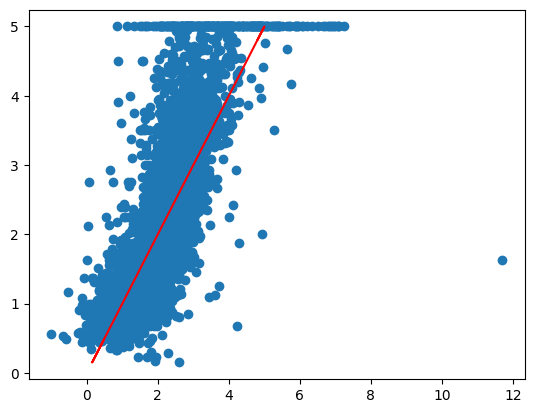

In [ ]:
plt.scatter(y_pred, y_test)
plt.plot(y_test, y_test, c='r')

# PolynomialFeatures

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_train = PolynomialFeatures(2).fit_transform(X_train) # используем полиномиальные признаки пятой степени
poly_test = PolynomialFeatures(2).fit_transform(X_test) # используем полиномиальные признаки пятой степени

polynomial = LinearRegression()
polynomial.fit(poly_train, y_train)
y_pred_poly = polynomial.predict(poly_test)
r2_score(y_test.tolist(), y_pred_poly)

0.6563005894194118

In [ ]:
import plotly.graph_objects as go

scatter_trace = go.Scatter(x=y_pred_poly, y=y_test, mode='markers', name='Точки')
line_trace = go.Scatter(x=y_test, y=y_test, mode='lines', name='Линия')
fig = go.Figure(data=[scatter_trace, line_trace])

fig.show()

# 1) Какую еще информацию можно вывести для обученной модели? Попробуйте изменить аргументы при создании модели и посмотрите, как это влияет на качество предсказания.

In [ ]:
polynomial.coef_

array([-4.07904609e-08, -1.18149889e+01, -8.49101202e-01,  7.93341507e+00,
       -3.90263704e+01, -4.90165007e-04,  1.03727716e+00,  8.27990514e+00,
        5.74137596e+00, -3.05936096e-02,  1.59801803e-03,  3.86922839e-02,
       -1.38726408e-01,  5.11408705e-05, -3.84501146e-03, -1.61733233e-01,
       -1.51724214e-01,  2.11029781e-04, -5.98080380e-04,  1.09081916e-02,
        2.56573553e-06, -1.97181492e-03, -1.03455043e-02, -1.00661914e-02,
        1.16865965e-02, -1.16437968e-01, -5.51721919e-05,  2.13589483e-02,
        1.06985141e-01,  1.00602280e-01,  2.88810788e-01,  4.88926266e-04,
       -8.65448374e-02, -5.40042730e-01, -4.96189958e-01,  1.42020440e-09,
        2.44088253e-05,  1.05046721e-05,  3.64069361e-06,  5.25946150e-05,
        2.03788796e-02,  1.58781028e-02,  5.80472939e-02,  1.01661358e-01,
        3.81657320e-02])

In [ ]:
polynomial.rank_ # ранг матрицы X. Т.е. количество неколлинеарных столбцов

44

In [ ]:
polynomial.singular_

array([1.80738364e+09, 1.26545939e+07, 1.02765755e+07, 2.40189404e+06,
       4.35275741e+05, 3.31771380e+05, 3.17720985e+05, 1.68920211e+05,
       1.32741728e+05, 4.80305525e+04, 3.81804977e+04, 3.33632869e+04,
       2.02410750e+04, 1.97787906e+04, 1.72696657e+04, 1.06897549e+04,
       8.79698094e+03, 3.33095347e+03, 2.32786660e+03, 2.10554745e+03,
       1.94460258e+03, 1.70566466e+03, 1.34652164e+03, 9.81410487e+02,
       9.43989853e+02, 7.80421138e+02, 4.15175387e+02, 3.84230042e+02,
       3.55653060e+02, 2.98968751e+02, 2.60858233e+02, 2.15335716e+02,
       1.99489743e+02, 3.99620055e+01, 3.37980692e+01, 2.95056732e+01,
       1.29078858e+01, 1.11097923e+01, 2.32366054e+00, 2.13521531e+00,
       1.87794484e+00, 1.41132733e+00, 4.28532965e-01, 1.69322497e-01,
       2.00587289e-07])

In [ ]:
polynomial.intercept_ # свободный член (эпсилон)

205.9539261072914

In [ ]:
polynomial.n_features_in_ # количество факторов

45

In [ ]:
# только хуже стало
from sklearn.preprocessing import PolynomialFeatures
poly_train = PolynomialFeatures(2, interaction_only=True, include_bias=False, order = 'F').fit_transform(X_train) # используем полиномиальные признаки пятой степени
poly_test = PolynomialFeatures(2, interaction_only=True, include_bias=False, order = 'F').fit_transform(X_test) # используем полиномиальные признаки пятой степени

polynomial = LinearRegression()
polynomial.fit(poly_train, y_train)
y_pred_poly = polynomial.predict(poly_test)
r2_score(y_test.tolist(), y_pred_poly)

0.63719297158088

# 2) Попробуйте применить к той же задаче другие модели регрессии. Для каждой из них выведите визуализацию регрессии и оценку точности.

In [ ]:
from sklearn.metrics import *
def get_metrics(y_test, y_pred):
    print(f'MSE: {mean_squared_error(y_test, y_pred)}')
    print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}') # среднее абсолютное процентное отклонение между фактическими и прогнозными значениями
    print(f'R2: {r2_score(y_test, y_pred)}')


#2.1 Метод опорных векторов

In [ ]:
# a) Без ядра
# b) С гауссовым ядром
# c) С полиномиальным ядром

In [ ]:
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
# a) Без ядра
regr_a = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), LinearSVR(C=0.8, epsilon=0.2, max_iter=10000, random_state=42))
regr_a.fit(X_train, y_train)
y_pred = regr_a.predict(X_test)
get_metrics(y_test, y_pred)

MSE: 0.46319029355254887
MAPE: 0.2640193121484273
R2: 0.6499516656908483


In [ ]:
# b) С гауссовым ядром
regr_b = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), SVR(kernel='rbf', C=100, gamma=0.1))
regr_b.fit(X_train, y_train)
y_pred = regr_b.predict(X_test)
get_metrics(y_test, y_pred)

MSE: 0.36165617057843275
MAPE: 0.22639024861063484
R2: 0.7266843846561641


In [ ]:
# c) С полиномиальным ядром
regr_b = make_pipeline(StandardScaler(), SVR(kernel='poly', degree=2, coef0 = 0.5))
regr_b.fit(X_train, y_train)
y_pred = regr_b.predict(X_test)
get_metrics(y_test, y_pred)

MSE: 0.4727480300435908
MAPE: 0.24675266633144724
R2: 0.6427285658439266


## 2.2 Метод ближайших соседей

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=8, weights='distance', algorithm = 'ball_tree', leaf_size = 40)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
get_metrics(y_test, y_pred)

MSE: 1.0835944836432079
MAPE: 0.5321340992537724
R2: 0.18109155276834943


In [ ]:
import plotly.graph_objects as go

scatter_trace = go.Scatter(x=y_pred, y=y_test, mode='markers', name='Точки')
line_trace = go.Scatter(x=y_test, y=y_test, mode='lines', name='Линия')
fig = go.Figure(data=[scatter_trace, line_trace])

fig.show()

## 2.3 Многослойный перцептрон

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
regr = MLPRegressor(max_iter=500,
                    activation = 'logistic',
                    warm_start = True,
                    verbose=False,
                    random_state = 42,
                    tol=0.00001).fit(X_train, y_train)
y_pred = regr.predict(X_test)
get_metrics(y_test, y_pred)

MSE: 0.4906361782387342
MAPE: 0.3259959393035156
R2: 0.6292098963753601


## 2.4 Дерево решений

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42,
                                  criterion = 'friedman_mse',
                                  max_depth=8,
                                  min_samples_split = 40,
                                  min_samples_leaf = 12,
                                  max_leaf_nodes = 150)

regressor.fit(X_train, y_train)
np.mean(cross_val_score(regressor, X_test, y_test, cv=5))

0.6587413089609758

# Некоторые другие модели

## a) Гребневую регрессию

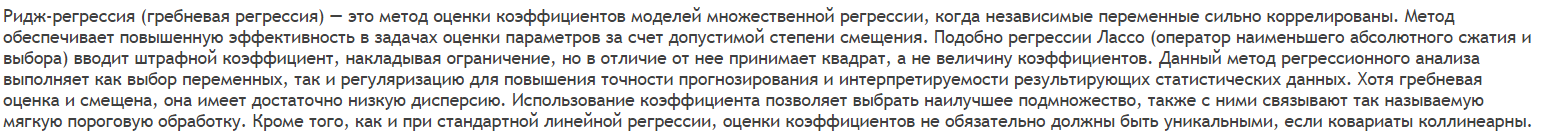

In [ ]:
! pip install pingouin >> None

In [ ]:
import pingouin as pg
pcorr_df = data.pcorr().round(4)
pcorr_df.style.background_gradient(cmap='coolwarm').set_caption('Partial correlation matrix')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.167300,0.672700,-0.645800,-0.011900,0.061900,-0.089200,-0.062100,0.586700
HouseAge,-0.167300,1.000000,-0.025300,-0.002300,-0.316000,0.052400,-0.181700,-0.197700,0.145600
AveRooms,0.672700,-0.025300,1.000000,0.922600,-0.038600,-0.028300,0.242100,0.197100,-0.125900
AveBedrms,-0.645800,-0.002300,0.922600,1.000000,0.007800,0.027400,-0.145100,-0.105700,0.157600
Population,-0.011900,-0.316000,-0.038600,0.007800,1.000000,0.079900,-0.096700,-0.071600,-0.005800
AveOccup,0.061900,0.052400,-0.028300,0.027400,0.079900,1.000000,0.015200,0.012800,-0.054000
Latitude,-0.089200,-0.181700,0.242100,-0.145100,-0.096700,0.015200,1.000000,-0.949200,-0.377400
Longitude,-0.062100,-0.197700,0.197100,-0.105700,-0.071600,0.012800,-0.949200,1.000000,-0.372700
Price,0.586700,0.145600,-0.125900,0.157600,-0.005800,-0.054000,-0.377400,-0.372700,1.000000


In [ ]:
from sklearn.linear_model import Ridge
import numpy as np
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)
np.mean(cross_val_score(clf, X_test, y_test, cv=5))

0.5893651119928409